In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [22]:
X_train = pd.read_csv('../data/ohe-no-norm/X_train.csv')
y_train = pd.read_csv('../data/ohe-no-norm/y_train.csv')
X_test = pd.read_csv('../data/ohe-no-norm/X_test.csv')
y_test = pd.read_csv('../data/ohe-no-norm/y_test.csv')

In [12]:
ridge = Ridge()

parameters = {'alpha':np.arange(0.1,10,0.1)}

gs = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error',cv=5)

#fit the grid search
gs.fit(X_train,y_train)

# best estimator
print('grid search best score: ',gs.best_score_)
print('grid search best params: ',gs.best_params_)

# best model
best_model = gs.best_estimator_
best_model.fit(X_train,y_train)
print('rmse ridge:',mean_squared_error(y_test, best_model.predict(X_test), squared=False))
print('mape ridge:',mean_absolute_percentage_error(y_test, best_model.predict(X_test)))


grid search best score:  -0.04653515391570824
grid search best params:  {'alpha': 7.4}
rmse ridge: 0.04754548498806861
mape ridge: 3.5484002751761814


In [13]:
lasso = Lasso()
parameters = {'alpha':np.arange(0.1,10,0.1)}

gs = GridSearchCV(lasso, parameters, scoring='neg_root_mean_squared_error',cv=5)

#fit the grid search
gs.fit(X_train,y_train)

# best estimator
print('grid search best score: ',gs.best_score_)
print('grid search best params: ',gs.best_params_)

# best model
best_model = gs.best_estimator_
best_model.fit(X_train,y_train)
print('rmse lasso:',mean_squared_error(y_test, best_model.predict(X_test), squared=False))
print('mape lasso:',mean_absolute_percentage_error(y_test, best_model.predict(X_test)))


grid search best score:  -0.0849191402214115
grid search best params:  {'alpha': 0.1}
rmse lasso: 0.08532239821726882
mape lasso: 1.8663029131006683


In [14]:
en = ElasticNet()
parameters = {'alpha':np.arange(0.1,10,0.1)}

gs = GridSearchCV(en, parameters, scoring='neg_root_mean_squared_error',cv=5)

#fit the grid search
gs.fit(X_train,y_train)

# best estimator
print('grid search best score: ',gs.best_score_)
print('grid search best params: ',gs.best_params_)

# best model
best_model = gs.best_estimator_
best_model.fit(X_train,y_train)
print('rmse ElasticNet:',mean_squared_error(y_test, best_model.predict(X_test), squared=False))
print('mape ElasticNet:',mean_absolute_percentage_error(y_test, best_model.predict(X_test)))


grid search best score:  -0.08473846024974921
grid search best params:  {'alpha': 0.1}
rmse ElasticNet: 0.08509557859480246
mape ElasticNet: 2.054141395257026


In [15]:
random_forest = RandomForestRegressor()
parameters = {'n_estimators':[10,25,50,100],
             'max_depth':[3,5,7],
             'min_samples_split':[2,4,6]}

gs = GridSearchCV(random_forest, parameters, scoring='neg_root_mean_squared_error',cv=5)

#fit the grid search
gs.fit(X_train,y_train)

# best estimator
print('grid search best score: ',gs.best_score_)
print('grid search best params: ',gs.best_params_)

# best model
best_model = gs.best_estimator_
best_model.fit(X_train,y_train)
print('rmse random_forest:',mean_squared_error(y_test, best_model.predict(X_test), squared=False))
print('mape random_forest:',mean_absolute_percentage_error(y_test, best_model.predict(X_test)))


grid search best score:  -0.045330251797472146
grid search best params:  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
rmse random_forest: 0.045519647150819006
mape random_forest: 3.6758298796294278


In [16]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(1,20,1)}

gs = GridSearchCV(knn, parameters, scoring='neg_root_mean_squared_error',cv=5)

#fit the grid search
gs.fit(X_train,y_train)

# best estimator
print('grid search best score: ',gs.best_score_)
print('grid search best params: ',gs.best_params_)

# best model
best_model = gs.best_estimator_
best_model.fit(X_train,y_train)
print('rmse knn:',mean_squared_error(y_test, best_model.predict(X_test), squared=False))
print('mape knn:',mean_absolute_percentage_error(y_test, best_model.predict(X_test)))


grid search best score:  -0.0821502559870386
grid search best params:  {'n_neighbors': 19}
rmse knn: 0.08342843510491607
mape knn: 3.00055230341957


In [24]:
cat = CatBoostRegressor(verbose = False,eval_metric = 'RMSE')
grid = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = cat.grid_search(grid, X=X_train, y=y_train,verbose = 0)


bestTest = 0.04306794331
bestIteration = 974


bestTest = 0.04263949513
bestIteration = 917


bestTest = 0.04298825639
bestIteration = 995


bestTest = 0.04262821597
bestIteration = 942


bestTest = 0.04307191408
bestIteration = 996


bestTest = 0.04257856823
bestIteration = 866


bestTest = 0.0431308686
bestIteration = 999


bestTest = 0.04277343187
bestIteration = 948


bestTest = 0.04319301674
bestIteration = 989


bestTest = 0.04272281482
bestIteration = 839


bestTest = 0.04203939303
bestIteration = 997


bestTest = 0.04228163948
bestIteration = 470


bestTest = 0.04212042262
bestIteration = 952


bestTest = 0.04218086199
bestIteration = 575


bestTest = 0.04218394817
bestIteration = 998


bestTest = 0.04225569902
bestIteration = 403


bestTest = 0.04208810034
bestIteration = 999


bestTest = 0.04206202685
bestIteration = 500


bestTest = 0.04220094516
bestIteration = 984


bestTest = 0.04216146265
bestIteration = 654


bestTest = 0.04155535064
bestIteration = 910


bestTest = 0.

In [26]:
grid_search_result['params']

{'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [27]:
cat = CatBoostRegressor(verbose = False,depth = 6,l2_leaf_reg = 1,learning_rate = 0.03)
cat.fit(X_train,y_train)
print('rmse cat:',mean_squared_error(y_test, cat.predict(X_test), squared=False))
print('mape cat:',mean_absolute_percentage_error(y_test, cat.predict(X_test)))


rmse cat: 0.04428824188345019
mape cat: 2.506356036380934


In [32]:
X_train = pd.read_csv('../data/no-ohe-no-norm/X_train.csv')
y_train = pd.read_csv('../data/no-ohe-no-norm/y_train.csv')
X_test = pd.read_csv('../data/no-ohe-no-norm/X_test.csv')
y_test = pd.read_csv('../data/no-ohe-no-norm/y_test.csv')

X_train['atm_group'] = X_train['atm_group'].astype(str)
X_test['atm_group'] = X_test['atm_group'].astype(str)

In [33]:
cat = CatBoostRegressor(verbose = False,eval_metric = 'RMSE',cat_features= ['atm_group', 'region','fed_dist'])
grid = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = cat.grid_search(grid, X=X_train, y=y_train,verbose = 0)


bestTest = 0.04254543078
bestIteration = 886


bestTest = 0.04232507816
bestIteration = 666


bestTest = 0.04251213447
bestIteration = 980


bestTest = 0.04220568475
bestIteration = 995


bestTest = 0.04246849911
bestIteration = 998


bestTest = 0.04234902501
bestIteration = 635


bestTest = 0.0425689036
bestIteration = 998


bestTest = 0.04233626867
bestIteration = 634


bestTest = 0.04251301867
bestIteration = 999


bestTest = 0.04241588345
bestIteration = 999


bestTest = 0.04156562005
bestIteration = 978


bestTest = 0.04158715193
bestIteration = 788


bestTest = 0.04155062122
bestIteration = 992


bestTest = 0.04164009054
bestIteration = 855


bestTest = 0.04169329101
bestIteration = 941


bestTest = 0.04175482847
bestIteration = 673


bestTest = 0.04171009811
bestIteration = 999


bestTest = 0.04174343478
bestIteration = 919


bestTest = 0.04178529222
bestIteration = 999


bestTest = 0.04163224356
bestIteration = 634


bestTest = 0.04122597759
bestIteration = 983


bestTest = 0.

In [34]:
grid_search_result['params']

{'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.03}

In [37]:
cat = CatBoostRegressor(verbose = False,eval_metric = 'RMSE',cat_features= ['atm_group', 'region','fed_dist'],depth = 6,l2_leaf_reg = 3,learning_rate = 0.03)
cat.fit(X_train,y_train)
print('rmse cat:',mean_squared_error(y_test, cat.predict(X_test), squared=False))
print('mape cat:',mean_absolute_percentage_error(y_test, cat.predict(X_test)))


rmse cat: 0.044033041680083124
mape cat: 2.7043993672656796


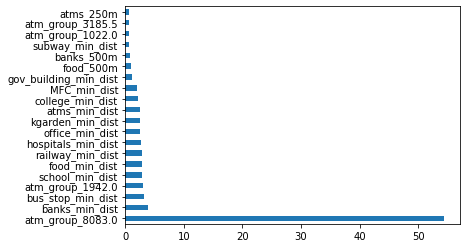

In [ ]:
feat_importances = pd.Series(cat.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')
